# Customer Segmentation Using KMeans Clustering 


###### Author - R Sruthi Parvatha

In [26]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize']=(10,5)
plt.style.use('ggplot')

In [27]:
dataset = pd.read_csv('Mall_customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
dataset.shape

(200, 5)

In [29]:
# To clean up the data
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [30]:
# Rename the columns
dataset.columns = ['CustomerID','Gender','Age','Annual_Income','Spending_Score']
dataset.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
dataset.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID        200 non-null int64
Gender            200 non-null object
Age               200 non-null int64
Annual_Income     200 non-null int64
Spending_Score    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [33]:
# removing the CustomerID column from the dataset, as it is not needed for analysis
dataset = dataset.iloc[:,1:]
dataset.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


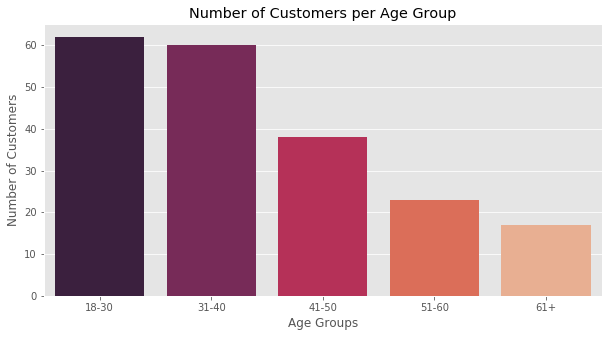

In [34]:
# Plot show the number of customers per age groups
ages18_30 = dataset.Age[(dataset.Age>=18) & (dataset.Age<=30)]
ages31_40 = dataset.Age[(dataset.Age>=31) & (dataset.Age<=40)]
ages41_50 = dataset.Age[(dataset.Age>=41) & (dataset.Age<=50)]
ages51_60 = dataset.Age[(dataset.Age>=51) & (dataset.Age<=60)]
ages61Plus = dataset.Age[dataset.Age>=61]
x = ["18-30","31-40","41-50","51-60","61+"]
y = [len(ages18_30.values), len(ages31_40.values),len(ages41_50.values), len(ages51_60.values), len(ages61Plus.values)]
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customers per Age Group")
plt.xlabel("Age Groups")
plt.ylabel("Number of Customers")
plt.show()

In [35]:
dataset['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

[112  88]


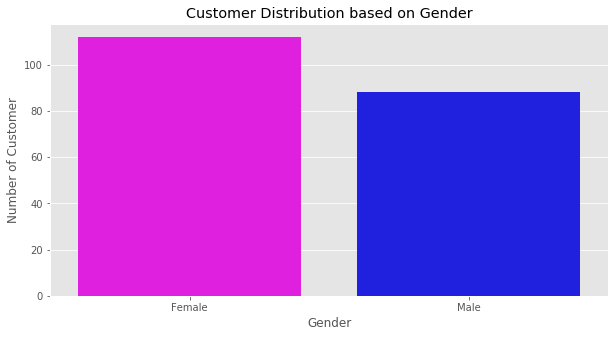

In [36]:
# To show the distribution of Gender in the graph
gender = dataset['Gender'].value_counts()
print(gender.values)
sns.barplot(x = gender.index, y = gender.values,palette=["magenta","blue"])
plt.title("Distribution of Customers based on Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customer")
plt.show()

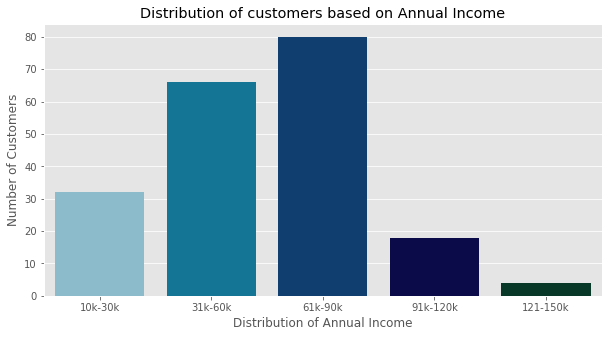

In [37]:
annInc_30 = dataset.Annual_Income[(dataset.Annual_Income>=10) & (dataset.Annual_Income<=30)]
annInc_60 = dataset.Annual_Income[(dataset.Annual_Income>=31) & (dataset.Annual_Income<=60)]
annInc_90 = dataset.Annual_Income[(dataset.Annual_Income>=61) & (dataset.Annual_Income<=90)]
annInc_120 = dataset.Annual_Income[(dataset.Annual_Income>=91) & (dataset.Annual_Income<=120)]
annInc_150 = dataset.Annual_Income[(dataset.Annual_Income>=121) & (dataset.Annual_Income<=150)]
x = ["10k-30k","31k-60k","61k-90k","91k-120k","121-150k"]
y = [len(annInc_30.values),len(annInc_60.values),len(annInc_90.values), len(annInc_120.values), len(annInc_150.values)]
sns.barplot(x=x, y=y, palette="ocean_r")
plt.title("Distribution of customers based on Annual Income")
plt.xlabel("Distribution of Annual Income")
plt.ylabel("Number of Customers")
plt.show()

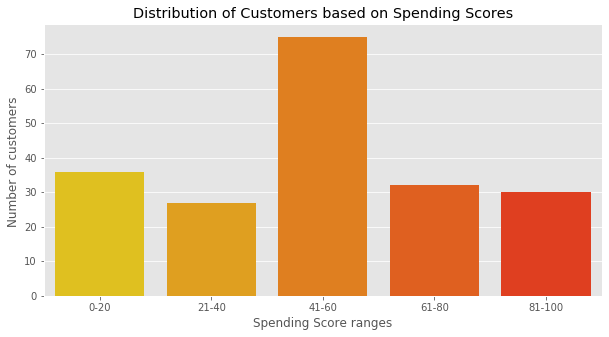

In [38]:
spscore_20 = dataset.Spending_Score[(dataset.Spending_Score>=0) & (dataset.Spending_Score<=20)]
spscore_40 = dataset.Spending_Score[(dataset.Spending_Score>=21) & (dataset.Spending_Score<=40)]
spscore_60 = dataset.Spending_Score[(dataset.Spending_Score>=41) & (dataset.Spending_Score<=60)]
spscore_80 = dataset.Spending_Score[(dataset.Spending_Score>=61) & (dataset.Spending_Score<=80)]
spscore_100 = dataset.Spending_Score[(dataset.Spending_Score>=81) & (dataset.Spending_Score<=100)]
x = ["0-20","21-40","41-60","61-80","81-100"]
y = [len(spscore_20.values),len(spscore_40.values),len(spscore_60.values),len(spscore_80.values),len(spscore_100.values)]
sns.barplot(x=x, y=y, palette = "autumn_r")
plt.title("Distribution of Customers based on Spending Scores")
plt.xlabel("Spending Score ranges")
plt.ylabel("Number of customers ")
plt.show()


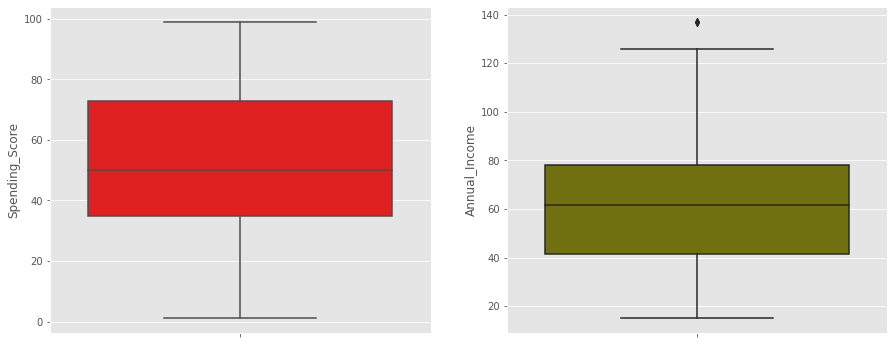

In [41]:
# Subplots to display boxplots of Spending_Score and Annual_Income side by side in a single row
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df.Spending_Score, color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df.Annual_Income, color="olive")
plt.show()

In [42]:
# Performing one hot encoding for the column Gender having categorical values.This just adds additional columns with 1/0(true/false)
# values, having no unecessary weights assoscited to the categories.
df = pd.get_dummies(dataset, columns=['Gender'])
df.head()

,Age,Annual_Income,Spending_Score,Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


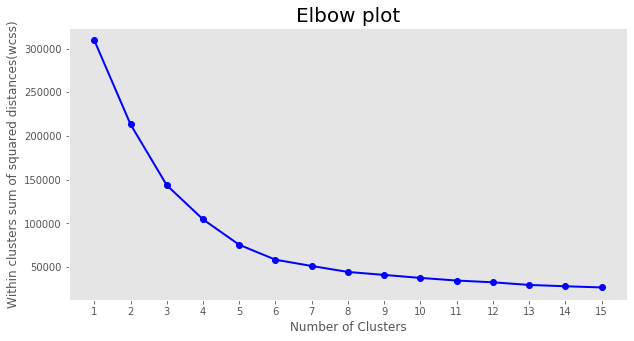

In [59]:
# KMeans Clustering and find the no of clusters using Elbow Method:
inertia_values = []
for k in range(1,16):
    model = KMeans(init='k-means++', 
                   n_clusters=k, 
                   n_init=10,
                   max_iter=300, 
                   random_state=42)
    model.fit(df)
    inertia_values.append(model.inertia_)
    
# inertia_values is nothing but within cluster sum of squares distances of points from the centroids
# print(inertia_values)

# Elbow Plot
plt.plot(range(1,16), inertia_values, color='blue', marker='o', linewidth=2)
plt.xlabel('Number of Clusters')
plt.ylabel('Within clusters sum of squared distances(wcss)')
plt.xticks(range(1,16))
plt.title('Elbow plot',fontsize=20)
plt.grid()
plt.show()
    

In [60]:
# From above we can infer that for KMeans n_clusters=5
# Remodel KMeans and fitting to the dataset
km = KMeans( n_clusters=5,
            init='k-means++',
            max_iter=300,
            n_init=10,
            random_state=42
           )
df['cluster'] = km.fit_predict(df.iloc[:,1:])
df.tail()

,Age,Annual_Income,Spending_Score,Gender_Female,Gender_Male,cluster
195,35,120,79,1,0,4
196,45,126,28,1,0,1
197,32,126,74,0,1,4
198,32,137,18,0,1,1
199,30,137,83,0,1,4


In [45]:
# Distribution of customers amongst the clusters
df.cluster.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: cluster, dtype: int64

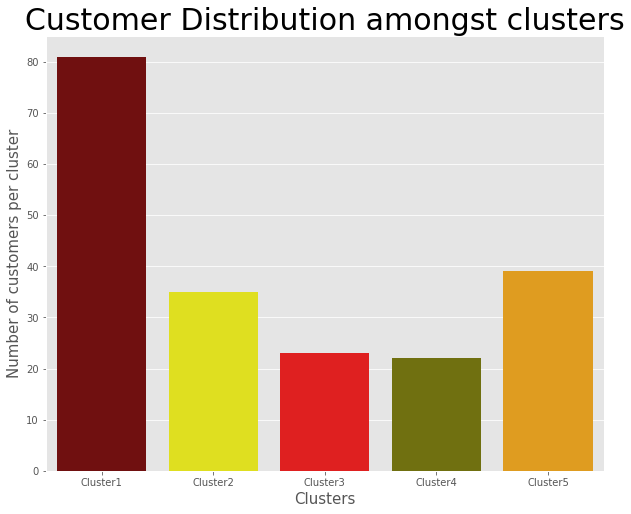

In [61]:
plt.figure(figsize=(10,8))
x=["Cluster1","Cluster2","Cluster3","Cluster4","Cluster5"]
y=[len(df[df.cluster==0].values),len(df[df.cluster==1].values),len(df[df.cluster==2].values),len(df[df.cluster==3].values),len(df[df.cluster==4].values)]
sns.barplot(x=x,y=y,palette=['maroon','yellow','red','olive','orange'])
plt.title("Customer Distribution amongst clusters", fontsize=30)
plt.xlabel("Clusters", fontsize=15)
plt.ylabel("Number of customers per cluster", fontsize=15)
plt.show()

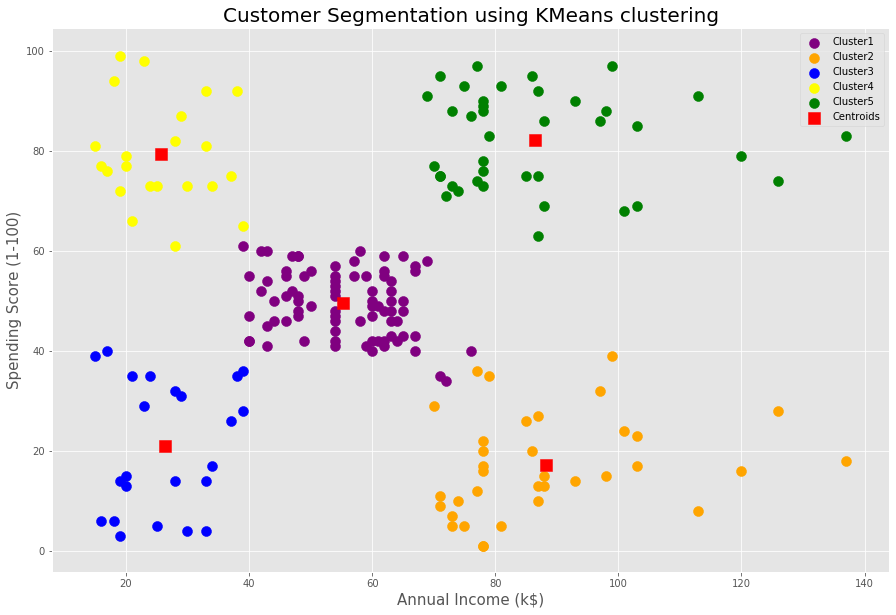

In [62]:
#Visualization of KMeans clusters using 2D plot

plt.figure(figsize=(15,10))
plt.scatter(df.Annual_Income[df.cluster==0], df.Spending_Score[df.cluster==0], c='purple', s=100,marker='o', label='Cluster1')
plt.scatter(df.Annual_Income[df.cluster==1], df.Spending_Score[df.cluster==1], c='orange', s=100,marker='o', label='Cluster2')
plt.scatter(df.Annual_Income[df.cluster==2], df.Spending_Score[df.cluster==2], c='blue', s=100,marker='o', label='Cluster3')
plt.scatter(df.Annual_Income[df.cluster==3], df.Spending_Score[df.cluster==3], c='yellow', s=100,marker='o', label='Cluster4')
plt.scatter(df.Annual_Income[df.cluster==4], df.Spending_Score[df.cluster==4], c='green', s=100,marker='o', label='Cluster5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='red', s=150, marker='s',label='Centroids')
plt.legend()
plt.title("Customer Segmentation using KMeans clustering", fontsize=20)
plt.xlabel("Annual Income (k$)", fontsize=15)
plt.ylabel("Spending Score (1-100)", fontsize=15)
plt.show();



In [ ]:
I

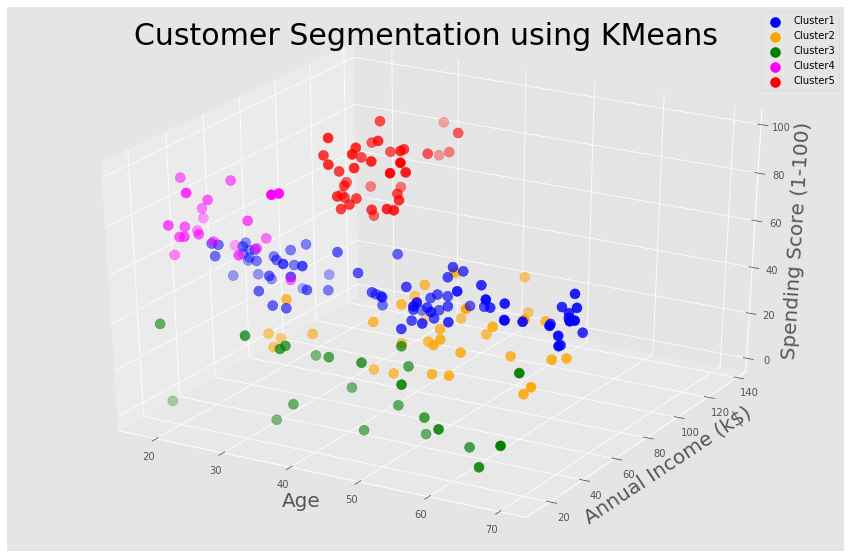

In [64]:
#Visualization of the KMeans clusters using 3D plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.cluster==0],df.Annual_Income[df.cluster==0],df.Spending_Score[df.cluster==0], s=100, c='blue',marker='o', label='Cluster1');
ax.scatter(df.Age[df.cluster==1], df.Annual_Income[df.cluster==1], df.Spending_Score[df.cluster==1], s=100, c='orange', marker='o', label='Cluster2')
ax.scatter(df.Age[df.cluster==2], df.Annual_Income[df.cluster==2], df.Spending_Score[df.cluster==2], s=100, c='green', marker='o', label='Cluster3')
ax.scatter(df.Age[df.cluster==3], df.Annual_Income[df.cluster==3], df.Spending_Score[df.cluster==3], s=100, c='magenta', marker='o', label='Cluster4')
ax.scatter(df.Age[df.cluster==4], df.Annual_Income[df.cluster==4], df.Spending_Score[df.cluster==4], s=100, c='red', marker='o', label='Cluster5')



ax.set_title("Customer Segmentation using KMeans", fontsize=30)
ax.set_xlabel("Age", fontsize=20)
ax.set_ylabel("Annual Income (k$)", fontsize=20)
ax.set_zlabel("Spending Score (1-100)", fontsize=20)
ax.legend();